In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 
from scipy.stats import linregress
from nba_api.stats.static import teams

In [3]:
# set city to search
#city = 'oklahoma'
city = 'houston'

# set output files
dir_name ="../nick/"
player_name = "Russell Westbrook"
#player_name = "Chris Paul"
filename_suffix =".csv"
season_out = os.path.join(dir_name, player_name  + filename_suffix)
#season_out
output_file = os.path.join("Plot/", player_name + "_WL.png")
output_file2 = os.path.join("Plot/", player_name + "_pts_plusMinus.png")

In [4]:
player_df = pd.read_csv(season_out)
player_df.head()

,Unnamed: 0,SEASON_ID_x,Player_ID,Game_ID,GAME_DATE_x,MATCHUP_x,WL_x,MIN_x,FGM_x,FGA_x,...,OREB_y,DREB_y,REB_y,AST_y,STL_y,BLK_y,TOV_y,PF_y,PLUS_MINUS_y,TS_x
0,0,22018,201566,21801226,"APR 10, 2019",OKC @ MIL,W,36,7,10,...,9,44,53,40,7,3,12,20,11.0,0.689338
1,1,22018,201566,21801218,"APR 09, 2019",OKC vs. HOU,W,37,11,23,...,18,38,56,20,5,2,12,19,1.0,0.596217
2,2,22018,201566,21801197,"APR 07, 2019",OKC @ MIN,W,38,10,22,...,14,32,46,27,6,4,13,30,6.0,0.538278
3,3,22018,201566,21801186,"APR 05, 2019",OKC vs. DET,W,35,6,18,...,21,38,59,30,10,4,17,24,13.0,0.424107
4,4,22018,201566,21801161,"APR 02, 2019",OKC vs. LAL,W,37,8,23,...,17,33,50,33,15,7,12,14,16.0,0.411184


In [5]:
# total game played by a given player last season
Total_games = len(player_df) # total games played in official season
Total_games

73

In [6]:
player_extract_df = player_df[["GAME_ID","MATCHUP_x","GAME_DATE_x","WL_x","PTS_x","PLUS_MINUS_x"]]
player_extract_df.head()

,GAME_ID,MATCHUP_x,GAME_DATE_x,WL_x,PTS_x,PLUS_MINUS_x
0,21801226,OKC @ MIL,"APR 10, 2019",W,15,6
1,21801218,OKC vs. HOU,"APR 09, 2019",W,29,3
2,21801197,OKC @ MIN,"APR 07, 2019",W,27,-1
3,21801186,OKC vs. DET,"APR 05, 2019",W,19,4
4,21801161,OKC vs. LAL,"APR 02, 2019",W,20,24


In [7]:
# rename columns
player_extract_df = player_extract_df.rename(columns={"MATCHUP_x": "MATCHUP",
                                  "GAME_DATE_x":"GAME_DATE",
                                  "WL_x":"WL",
                                  "PTS_x":"PTS",
                                  "PLUS_MINUS_x":"PLUS_MINUS"})
player_extract_df.head()

,GAME_ID,MATCHUP,GAME_DATE,WL,PTS,PLUS_MINUS
0,21801226,OKC @ MIL,"APR 10, 2019",W,15,6
1,21801218,OKC vs. HOU,"APR 09, 2019",W,29,3
2,21801197,OKC @ MIN,"APR 07, 2019",W,27,-1
3,21801186,OKC vs. DET,"APR 05, 2019",W,19,4
4,21801161,OKC vs. LAL,"APR 02, 2019",W,20,24


In [8]:
WL_df = player_extract_df.groupby("WL").count()["GAME_ID"]
WL_df

WL
L    29
W    44
Name: GAME_ID, dtype: int64

In [9]:
Home_df = player_extract_df[player_extract_df['MATCHUP'].str.contains("@")]
Home_df.head()

,GAME_ID,MATCHUP,GAME_DATE,WL,PTS,PLUS_MINUS
0,21801226,OKC @ MIL,"APR 10, 2019",W,15,6
2,21801197,OKC @ MIN,"APR 07, 2019",W,27,-1
8,21801104,OKC @ MEM,"MAR 25, 2019",L,16,-20
9,21801083,OKC @ TOR,"MAR 22, 2019",W,18,18
12,21801020,OKC @ IND,"MAR 14, 2019",L,19,-1


In [10]:
away_df = player_extract_df[player_extract_df['MATCHUP'].str.contains("vs")]
away_df.head()

,GAME_ID,MATCHUP,GAME_DATE,WL,PTS,PLUS_MINUS
1,21801218,OKC vs. HOU,"APR 09, 2019",W,29,3
3,21801186,OKC vs. DET,"APR 05, 2019",W,19,4
4,21801161,OKC vs. LAL,"APR 02, 2019",W,20,24
5,21801146,OKC vs. DAL,"MAR 31, 2019",L,25,-3
6,21801133,OKC vs. DEN,"MAR 29, 2019",L,27,-1


In [11]:
home_WL = Home_df.groupby("WL").count()["GAME_ID"]
home_WL_df = pd.DataFrame(home_WL)
home_WL_df.columns=['Home']
home_WL_df

,Home
WL,
L,16
W,20


In [12]:
away_WL = away_df.groupby("WL").count()["GAME_ID"]
away_WL_df = pd.DataFrame(away_WL)
away_WL_df.columns=['Away']
away_WL_df

,Away
WL,
L,13
W,24


In [13]:
WL_df = pd.DataFrame(WL_df)
WL_df.columns=['Total']

#WL_df.merge(away_WL_df,on="WL")
WL_df

,Total
WL,
L,29
W,44


In [14]:
Total_perc = WL_df["Total"]/Total_games *100
Total_perc_df = pd.DataFrame(Total_perc).round(decimals=2)
Total_perc_df.columns=['Total (%)']
Total_perc_df

,Total (%)
WL,
L,39.73
W,60.27


In [15]:
#WL_df.merge(home_WL_df,on="WL",how="inner")
player_WL=pd.merge(WL_df,Total_perc_df,on="WL")
             
player_WL

,Total,Total (%)
WL,,
L,29,39.73
W,44,60.27


In [16]:
player_WL = pd.merge(player_WL,home_WL_df,on="WL")
player_WL

,Total,Total (%),Home
WL,,,
L,29,39.73,16
W,44,60.27,20


In [17]:
home_perc = player_WL['Home']/Total_games *100
home_perc_df = pd.DataFrame(home_perc).round(decimals=2)
home_perc_df.columns=['Home (%)']
home_perc_df

,Home (%)
WL,
L,21.92
W,27.40


In [18]:
player_WL = pd.merge(player_WL,home_perc_df,on="WL")
player_WL

,Total,Total (%),Home,Home (%)
WL,,,,
L,29,39.73,16,21.92
W,44,60.27,20,27.40


In [19]:
player_WL = pd.merge(player_WL,away_WL_df,on="WL")
player_WL

,Total,Total (%),Home,Home (%),Away
WL,,,,,
L,29,39.73,16,21.92,13
W,44,60.27,20,27.40,24


In [20]:
away_perc = player_WL['Away']/Total_games *100
away_perc_df = pd.DataFrame(away_perc).round(decimals=2)
away_perc_df.columns=['Away (%)']
away_perc_df

,Away (%)
WL,
L,17.81
W,32.88


In [21]:
player_WL=pd.merge(player_WL,away_perc_df,on="WL")
player_WL

,Total,Total (%),Home,Home (%),Away,Away (%)
WL,,,,,,
L,29,39.73,16,21.92,13,17.81
W,44,60.27,20,27.40,24,32.88


In [22]:
L=[player_WL["Total (%)"][0] , player_WL["Home (%)"][0] , player_WL["Away (%)"][0] ]
L

[39.73, 21.92, 17.81]

In [23]:
W=[player_WL["Total (%)"][1] , player_WL["Home (%)"][1] , player_WL["Away (%)"][1] ]
W

[60.27, 27.4, 32.88]

<IPython.core.display.Javascript object>


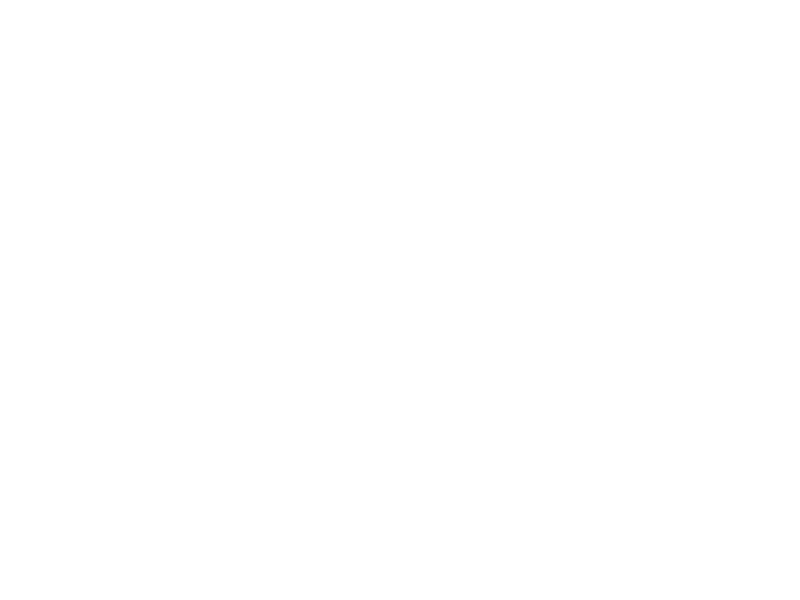

In [24]:
ymax = 70

fig1=plt.figure(1)

x_axis = np.arange(len(W))
plt.bar(x_axis -0.1,W,width=0.2,color='g',align='center',label="Win")
plt.bar(x_axis+0.1,L,width=0.2,color='r',align='center',label="Lost")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["All games","Home","Away"])

# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0,ymax)


# Give the chart a title, x label, and y label

plt.xlabel("Game type")
plt.ylabel("Percentage")

plt.legend(loc='best')

#title_str = "Percentage of WL -" +  full_name
plt.title(f"Percentage of WL - %s" %player_name)
plt.tight_layout()
plt.savefig(output_file)

In [25]:
plt.show()
plt.close(fig1)

## Look into the +/- data, combination of (W,L) and (Home,Away)

In [26]:
# compute average pts when away
away_WL_PT_mean = away_df.groupby("WL").mean()["PTS"]
away_WL_PT_mean

WL
L    24.769231
W    22.500000
Name: PTS, dtype: float64

In [27]:
# compute average plus_minus when away
away_WL_plus_Minus_mean = away_df.groupby("WL").mean()["PLUS_MINUS"]
away_WL_plus_Minus_mean

WL
L    -3.230769
W    10.583333
Name: PLUS_MINUS, dtype: float64

In [28]:
# compute average pts when home
home_WL_PT_mean = Home_df.groupby("WL").mean()["PTS"]
home_WL_PT_mean

WL
L    23.9375
W    21.5000
Name: PTS, dtype: float64

In [29]:
# compute average plus_minus when home
home_WL_plus_minus_mean = Home_df.groupby("WL").mean()["PLUS_MINUS"]
home_WL_plus_minus_mean

WL
L   -4.6875
W    7.8500
Name: PLUS_MINUS, dtype: float64

In [30]:
# extract Win from home 
Home_W_df = Home_df[Home_df["WL"] == "W"]
Home_W_df.head()

,GAME_ID,MATCHUP,GAME_DATE,WL,PTS,PLUS_MINUS
0,21801226,OKC @ MIL,"APR 10, 2019",W,15,6
2,21801197,OKC @ MIN,"APR 07, 2019",W,27,-1
9,21801083,OKC @ TOR,"MAR 22, 2019",W,18,18
14,21801005,OKC @ UTA,"MAR 11, 2019",W,23,10
16,21800976,OKC @ POR,"MAR 07, 2019",W,37,1


In [31]:
# extract lost from home 
Home_L_df = Home_df[Home_df["WL"] == "L"]
Home_L_df.head()

,GAME_ID,MATCHUP,GAME_DATE,WL,PTS,PLUS_MINUS
8,21801104,OKC @ MEM,"MAR 25, 2019",L,16,-20
12,21801020,OKC @ IND,"MAR 14, 2019",L,19,-1
15,21800985,OKC @ LAC,"MAR 08, 2019",L,32,-4
17,21800963,OKC @ MIN,"MAR 05, 2019",L,38,-2
19,21800940,OKC @ SAS,"MAR 02, 2019",L,19,-15


In [32]:
# extract win from away
away_W_df = away_df[away_df["WL"] == "W"]
away_W_df.head()

,GAME_ID,MATCHUP,GAME_DATE,WL,PTS,PLUS_MINUS
1,21801218,OKC vs. HOU,"APR 09, 2019",W,29,3
3,21801186,OKC vs. DET,"APR 05, 2019",W,19,4
4,21801161,OKC vs. LAL,"APR 02, 2019",W,20,24
7,21801119,OKC vs. IND,"MAR 27, 2019",W,17,8
13,21801017,OKC vs. BKN,"MAR 13, 2019",W,31,18


In [33]:
# extract lost from away
away_L_df = away_df[away_df["WL"] == "L"]
away_L_df

,GAME_ID,MATCHUP,GAME_DATE,WL,PTS,PLUS_MINUS
5,21801146,OKC vs. DAL,"MAR 31, 2019",L,25,-3
6,21801133,OKC vs. DEN,"MAR 29, 2019",L,27,-1
10,21801072,OKC vs. TOR,"MAR 20, 2019",L,42,-7
11,21801038,OKC vs. GSW,"MAR 16, 2019",L,7,-18
20,21800927,OKC vs. PHI,"FEB 28, 2019",L,23,-3
22,21800890,OKC vs. SAC,"FEB 23, 2019",L,41,-1
37,21800670,OKC vs. LAL,"JAN 17, 2019",L,26,5
41,21800603,OKC vs. MIN,"JAN 08, 2019",L,25,7
42,21800588,OKC vs. WAS,"JAN 06, 2019",L,22,-7
49,21800493,OKC vs. MIN,"DEC 23, 2018",L,23,7


In [34]:
away_L_PlusMinus = away_df[away_df["WL"] == "L"]["PLUS_MINUS"]
away_L_PlusMinus

5     -3
6     -1
10    -7
11   -18
20    -3
22    -1
37     5
41     7
42    -7
49     7
62    -3
71    -5
72   -13
Name: PLUS_MINUS, dtype: int64

In [35]:
away_L_Pts = away_df[away_df["WL"] == "L"]["PTS"]
away_L_Pts

5     25
6     27
10    42
11     7
20    23
22    41
37    26
41    25
42    22
49    23
62    16
71    13
72    32
Name: PTS, dtype: int64

In [36]:
Home_L_PlusMinus = Home_df[Home_df["WL"] == "L"]["PLUS_MINUS"]
Home_L_Pts = Home_df[Home_df["WL"] == "L"]["PTS"]

In [37]:
away_W_PlusMinus = away_df[away_df["WL"] == "W"]["PLUS_MINUS"]
away_W_Pts = away_df[away_df["WL"] == "W"]["PTS"]

In [38]:
Home_W_PlusMinus = Home_df[Home_df["WL"] == "W"]["PLUS_MINUS"]
Home_W_Pts = Home_df[Home_df["WL"] == "W"]["PTS"]

In [39]:
# prepare data for linear regression
PTS_ALL_df = player_extract_df[["PTS"]]
PLUS_MINUS_ALL_df = player_extract_df[["PLUS_MINUS"]]

In [40]:
# transform DF to series
PTS_ALL = PTS_ALL_df.squeeze()
PLUS_MINUS_ALL = PLUS_MINUS_ALL_df.squeeze()
 

In [41]:
max(PTS_ALL)

44

In [42]:
# linear regression

# Set line
(slope, intercept,  r_value, p_value, std_err) = linregress(PTS_ALL, PLUS_MINUS_ALL)

#x_axis = np.arange(70, 160, 10)
fit = slope * PTS_ALL + intercept
fit.head()
r_value

-0.032813987999635884

<IPython.core.display.Javascript object>


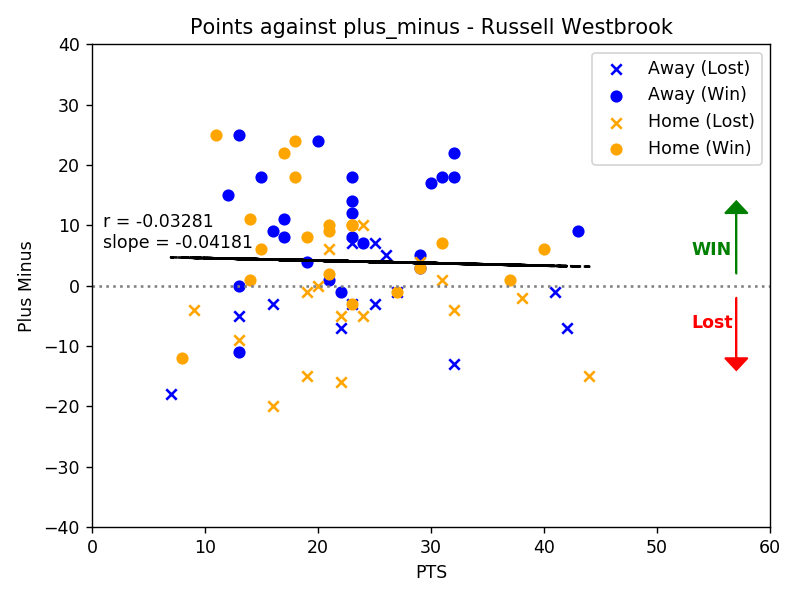

In [49]:
x_min = 0
x_max = 60
y_min = -40
y_max = 40

fig2=plt.figure(2)
plt.scatter(away_L_Pts,away_L_PlusMinus,color='blue',marker='x',label='Away (Lost)')
plt.scatter(away_W_Pts,away_W_PlusMinus,color='blue',marker='o',label='Away (Win)')
plt.scatter(Home_L_Pts,Home_L_PlusMinus,color='orange',marker='x',label='Home (Lost)')
plt.scatter(Home_W_Pts,Home_W_PlusMinus,color='orange',marker='o',label='Home (Win)')

plt.plot([x_min,x_max],[0,0],color='grey',linestyle=':')

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

plt.legend(loc='upper right')
plt.xlabel("PTS")
plt.ylabel("Plus Minus")
plt.title(f"Points against plus_minus - %s" %player_name)

plt.text(x_max-7, 5,"WIN",color='green',weight='bold')
plt.arrow(x_max-3,  2,0,10, head_width=2, head_length=2, fc='green', ec='green')

plt.text(x_max-7, -7,"Lost",color='red',weight='bold')
plt.arrow(x_max-3, -2,0,-10, head_width=2, head_length=2, fc='red', ec='red')

#plot linear regression 
r_value=r_value.round(decimals=5)
slope = slope.round(decimals=5)
plt.plot(PTS_ALL, fit, 'k--')

# for R. Westbrook
plt.text(x_min+1, max(fit)+5,f"r = {r_value}")
plt.text(x_min+1, max(fit)+1.5,f"slope = {slope}")

# for C. Paul
#plt.text(max(PTS_ALL)+1, max(fit)+0.5,f"r = {r_value}")
#plt.text(max(PTS_ALL)+1, max(fit)-3,f"slope = {slope}")
plt.tight_layout()


plt.savefig(output_file2)



In [44]:
plt.show()
plt.close(fig2)